
## Image Classification Using CNNs: Classifying Cats vs. Dogs

## Training a CNN from scratch on a small dataset

Having to train an image classification model using only very little data is a common situation, which you likely encounter yourself in
practice if you ever do computer vision in a professional context.

Having "few" samples can mean anywhere from a few hundreds to a few tens of thousands of images. As a practical example, we will focus on
classifying images as "dogs" or "cats", in a dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000
pictures for training, 1000 for validation, and finally 1000 for testing.

In this notebook, we will start by naively training a CNN on our 2000 training samples, without any regularization, to set a baseline for what can be achieved. Our main issue will be overfitting. Then, we will use dropout to combat overfitting. In the next section, we will introduce more advanced methods to improve the performance of CNNs.



## The relevance of deep learning for small-data problems

You will sometimes hear that deep learning only works when lots of data is available. This is in part a valid point: one fundamental characteristic of deep learning is that it is able to find interesting features in the training data on its own, without any need for manual
feature engineering, and this can only be achieved when lots of training examples are available. This is especially true for problems where the input samples are very high-dimensional, like images.

However, what constitutes "lots" of samples is relative -- relative to the size and depth of the network you are trying to train. It isn't possible to train a CNN to solve a complex problem with just a few tens of samples, but a few hundreds can
potentially suffice if the model is small and well-regularized and if the task is simple.
Because CNNs learn local, translation-invariant features, they are very
data-efficient on perceptual problems. Training a CNN from scratch on a very small image dataset will still yield reasonable results
despite a relative lack of data, without the need for any custom feature engineering. You will see this in action in this section.

## Importing the data

The cats vs. dogs dataset that we will use isn't packaged with Keras. It was made available by Kaggle.com as part of a computer vision
competition in late 2013 (`https://www.kaggle.com/c/dogs-vs-cats/data`).

The pictures are medium-resolution color JPEGs. They look like this:

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

Unsurprisingly, the cats vs. dogs Kaggle competition in 2013 was won by entrants who used CNNs.
This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543MB large (compressed). We will be using a subset of the data containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.


First, add the `cats_dogs_small` folder from [here](https://drive.google.com/drive/folders/11-2z9P45FtJJPm9LbipVMAnNZ36kMQUH) to your Google Drive. For example, you can drag and drop the `cats_dogs_small` folder into your "My Drive"; this will add a shortcut to the original folder in your "My Drive". By doing so, you can run your code directly on the data that are stored on my Google Drive account without the need to download the images and upload them to your Drive.

The next step is to mount your Google Drive so that you can use its content (e.g., the datasets) in your notebook.

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# The first time that you run this cell, you will need to authorize access in your drive.
# Go to the link and copy the authorization code

Mounted at /content/drive


In [2]:
import os
# Define base directory where the "cats_dogs_small" folder reside
# My path is the following:
base_dir = '/content/drive/MyDrive/Data/CNN_Datasets/cats_dogs_small'
# This is the path to where my files are - your path will be different.
# Modify the path above to where the "cats_dogs_small" folder is located on your drive.

# Define directories of where the training, validation and test sets reside
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Define directories of where the cats and dogs images reside
train_cats_dir = os.path.join(base_dir, 'train/cats')
train_dogs_dir = os.path.join(base_dir, 'train/dogs')
validation_cats_dir = os.path.join(base_dir, 'validation/cats')
validation_dogs_dir = os.path.join(base_dir, 'validation/dogs')
test_cats_dir = os.path.join(base_dir, 'test/cats')
test_dogs_dir = os.path.join(base_dir, 'test/dogs')

In [3]:
# Let's check the number of images in each set
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


So, we have indeed 2000 training images, 1000 validation images, and 1000 test images. In each split, there is the same number of
samples from each class. Note that this is a binary classification problem (cat vs. dog).

## Building our network

We've already built a small CNN for MNIST in the previous example, so you should be familiar with them. We will reuse the same
general structure: our CNN will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one
more `Conv2D` + `MaxPooling2D` stage. This serves both to augment the capacity of the network, and to further reduce the size of the
feature maps, so that they aren't overly large when we reach the `Flatten` layer.

Here, we start from inputs of size 150x150 (a
somewhat arbitrary choice). Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 7x7, see `model.summary`). This is a pattern that you will see in most CNNs.

Since we are attacking a binary classification problem, we are ending the network with a single unit (a `Dense` layer of size 1). This unit has `sigmoid` activation and will estimate the probability that the network is looking at one class or the other.



In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Build the model
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())

model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

**Question)** In the code block above, what are the hyperparameters (arbitrary choices)?

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

**Question)** Can you tell why the first two convolution layers have 896 and 18496 parameters?

**Answer)**

* number of weights = number of filters * filter height * filter
width * filter depth (which is equal to the depth of previous layer's feature map)
* number of biases = number of filters
* number of parameters = number of weights + number of biases

So,

* 32 * 3 * 3 * 3 + 32 = 896
* 64 * 3 * 3 * 32 + 64 = 18496

For our compilation step, we'll go with the `RMSprop` optimizer as usual. Since this is a binary classification problem, we are ending the network with a single unit and a `sigmoid` activation (as a reminder, check out the table in Module 1 slides for a cheatsheet on what output activation function and loss function to use in various situations).

In [ ]:
model1.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

## Data preprocessing

Data should be formatted into appropriately pre-processed floating point tensors before being fed into our
network. Currently, our data sits on the drive as JPEG files, so the steps for getting it into our network are roughly:

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small normalized input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image
processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we
will use here.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the directory where our training data reside
        train_dir,
        # We want all images to be resized to 150x150
        target_size=(150, 150),
        # Telling the data generator to prepare data in batches of size 20
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
        # Note: If our problem was a multi-class single-label classification,
        # we would use categorical_crossentropy loss and set class_mode to 'categorical'

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary
labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches
indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop
at some point.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let's fit our model to the data using the generator. The first argument is a Python generator that will yield batches of inputs and targets. The second argument is the number of epochs for training. The third argument is specifying the validation data, which can also be a data generator. If you pass a generator as `validation_data`, then this generator is expected to yield batches of validation data.


In [ ]:
model1_history = model1.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 1094s 11s/step - loss: 0.7037 - accuracy: 0.5620 - val_loss: 0.6698 - val_accuracy: 0.5780
Epoch 2/20
100/100 [==============================] - 13s 132ms/step - loss: 0.6481 - accuracy: 0.6485 - val_loss: 0.6633 - val_accuracy: 0.5790
Epoch 3/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6069 - accuracy: 0.6730 - val_loss: 0.8417 - val_accuracy: 0.6060
Epoch 4/20
100/100 [==============================] - 13s 127ms/step - loss: 0.5719 - accuracy: 0.7090 - val_loss: 0.6173 - val_accuracy: 0.6750
Epoch 5/20
100/100 [==============================] - 13s 127ms/step - loss: 0.5259 - accuracy: 0.7465 - val_loss: 0.6855 - val_accuracy: 0.6660
Epoch 6/20
100/100 [==============================] - 13s 129ms/step - loss: 0.4814 - accuracy: 0.7725 - val_loss: 0.5820 - val_accuracy: 0.6910
Epoch 7/20
100/100 [==============================] - 13s 126ms/step - loss: 0.4478 - accuracy: 0.7900 - val_loss: 0.5979 - val_ac

Let's plot the loss and accuracy of the model over the training and validation data during training:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


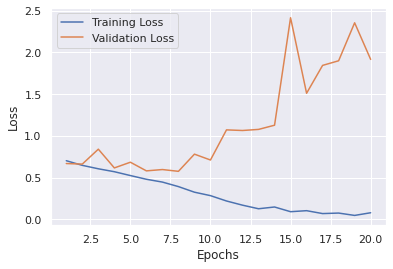

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc1  = model1_history.history['accuracy']
train_loss1 = model1_history.history['loss']
val_acc1  = model1_history.history['val_accuracy']
val_loss1 = model1_history.history['val_loss']

epochs = range(1, len(train_acc1) + 1)

plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.plot(epochs, val_loss1, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

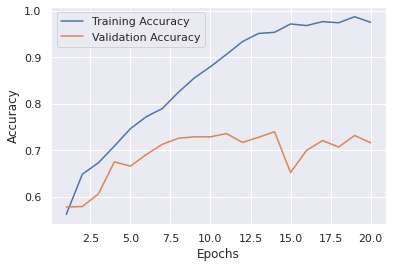

In [ ]:
plt.plot(epochs, train_acc1, label = 'Training Accuracy')
plt.plot(epochs, val_acc1, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

These plots are demonstrating overfitting. Our validation loss reaches its minimum after 8 epochs then it increases, while the training loss keeps decreasing until it reaches nearly 0. Our training accuracy increases over time, until it reaches nearly 100%, while our
validation accuracy stalls at 70-72%.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. You already know about a
number of techniques that can help mitigate overfitting, such as dropout and weight decay (e.g., L2 regularization).

Let's evaluate the model on test data.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model1.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 422s 8s/step - loss: 1.9006 - accuracy: 0.7040


[1.9006270170211792, 0.7039999961853027]

We achieved an accuracy of 70.4% on the test set.

Next, let's try the dropout method to see if it helps with overfitting. We apply the dropout layer after the flatten layer and before the fully connected layer. By doing so, we allow tne model to use only a random portion of the features extracted by the convolutional part of the network to make the classification. Hence, your model cannot rely on a small number of features to make predictions. Instead, it has to learn to make good predictions using a wide range of cat and dog features. This will likely reduce overfitting.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Build the model
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [ ]:
model2_history = model2.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 13s 129ms/step - loss: 0.7104 - accuracy: 0.5150 - val_loss: 0.6923 - val_accuracy: 0.5050
Epoch 2/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6917 - accuracy: 0.5595 - val_loss: 0.6677 - val_accuracy: 0.5510
Epoch 3/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6634 - accuracy: 0.6230 - val_loss: 0.6531 - val_accuracy: 0.6130
Epoch 4/20
100/100 [==============================] - 13s 127ms/step - loss: 0.6155 - accuracy: 0.6585 - val_loss: 0.5779 - val_accuracy: 0.7040
Epoch 5/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6198 - accuracy: 0.6865 - val_loss: 0.5889 - val_accuracy: 0.6990
Epoch 6/20
100/100 [==============================] - 13s 126ms/step - loss: 0.5542 - accuracy: 0.7175 - val_loss: 0.5888 - val_accuracy: 0.6920
Epoch 7/20
100/100 [==============================] - 13s 126ms/step - loss: 0.5492 - accuracy: 0.7280 - val_loss: 0.7173 - val_ac

Let's compare the validation loss of the original model against the dropout model.

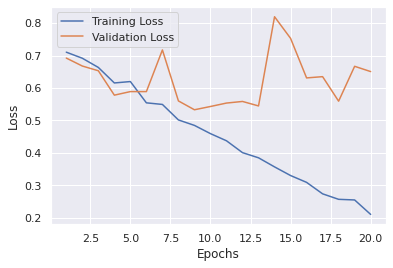

In [ ]:
train_loss2 = model2_history.history['loss']
val_loss2 = model2_history.history['val_loss']

epochs = range(1, len(train_loss2) + 1)

plt.plot(epochs, train_loss2, label = 'Training Loss')
plt.plot(epochs, val_loss2, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

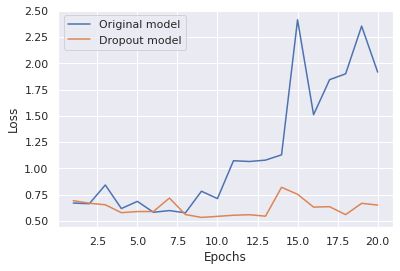

In [ ]:
plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss2, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

We can see that the dropout model overfits less as the loss curve for the dropout model starts to increase much slower compared to the original model when the two models start to overfit. Also, it appears that the dropout model starts to overfit after 13 epochs.

Let's evaluate the dropout model on the test data.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model2.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 79ms/step - loss: 0.6750 - accuracy: 0.7210


[0.6750258803367615, 0.7210000157356262]

We achieved an accuracy of 72.1%, which is slightly higher than what we got with the original model.

We can also stop training of the dropout model after 13 epochs and look at it's accuracy on the test set.

In [ ]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))

model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))


model3.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])


model3_history = model3.fit(
      train_generator,
      epochs=13,
      validation_data=validation_generator)


Epoch 1/13
100/100 [==============================] - 13s 128ms/step - loss: 0.7338 - accuracy: 0.5185 - val_loss: 0.6935 - val_accuracy: 0.5160
Epoch 2/13
100/100 [==============================] - 13s 126ms/step - loss: 0.6851 - accuracy: 0.5635 - val_loss: 0.6813 - val_accuracy: 0.5530
Epoch 3/13
100/100 [==============================] - 13s 126ms/step - loss: 0.6390 - accuracy: 0.6565 - val_loss: 0.6578 - val_accuracy: 0.6270
Epoch 4/13
100/100 [==============================] - 13s 126ms/step - loss: 0.5880 - accuracy: 0.6910 - val_loss: 0.6389 - val_accuracy: 0.6590
Epoch 5/13
100/100 [==============================] - 13s 127ms/step - loss: 0.5575 - accuracy: 0.7190 - val_loss: 0.5328 - val_accuracy: 0.7220
Epoch 6/13
100/100 [==============================] - 13s 126ms/step - loss: 0.5264 - accuracy: 0.7320 - val_loss: 0.5551 - val_accuracy: 0.6950
Epoch 7/13
100/100 [==============================] - 13s 126ms/step - loss: 0.5028 - accuracy: 0.7590 - val_loss: 0.5632 - val_ac

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model3.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 81ms/step - loss: 0.6534 - accuracy: 0.7330


[0.6534101963043213, 0.7329999804496765]

Combining early stopping with dropout increased the test accuracy to 73.3%.

In the next section, we are going to
introduce a new regularization method called *data augmentation*. We will also cover more advanced techniques to improve the performance of our CNN, specially when we deal with small datasets.